# Mathematical exercises

Solutions to the following exercises may be either typed into the submitted Jupyter notebook, or handwritten solutions may be scanned and submitted as a separate PDF file.


**Exercise 1** (3 points): Problem 3.11 from the PRML textbook: Make use of the matrix identity of the next problem to show that the uncertainty $\sigma_N^2(x)$ associated with the linear regression function satisfies $$\sigma_{N+1}^2(x) \le \sigma_N^2(x).$$

---
Recalling the formula given by $$\sigma^2_N(x) = \frac{1}{\beta} + \phi_N(x)^T S_N \phi_N(x),$$ it is enough to show that $\phi_{N+1}(x)^T S_{N+1}\phi_{N+1}(x) \le \phi_N(x)^T S_{N}\phi_N(x)$. Recalling the formula that $S_N(x)^{-1} = S_0^{-1} + \beta\phi(x)^T \phi(x)$, it follows that
$$S_N = S_0 - \frac{S_0 \phi_N(x)\phi_N(x)^T S_0}{1+ \phi_N(x)^T S_0 \phi_N(x)}$$

Since we can assume $S_0$ is symmetric, notice that when comparing $\phi_N(x)^TS_0\phi_N(x)$ with $\phi_{N+1}(x)^TS_0\phi_{N+1}(x)$, you are just adding the square-norm of one additional vector with respect to the positive-definite inner product defined by $S_0$, so it is immediate that $\phi_N(x)^TS_0\phi_N(x) \le \phi_{N+1}(x)^TS_0\phi_{N+1}(x)$. Consequently, considering the negative sign in the above formula, the result follows.

**Exercise 2** (3 points): In class we used the following formula for matrix inversion:
$$
(A^{-1} + \vec{u}\vec{v}^\top)^{-1} = A - \frac{A \vec{u} \vec{v}^\top A}{1 + \vec{v}^T A \vec{u}}
$$
where $A$ is an invertible matix. In addition to helping us prove our result about Bayesian regression, this formula is often useful because, although computing a matrix inverse is computationally costly in general, if we are just adding a rank-one perturbation to a matrix whose inverse we already know, inverting the new matrix is not so costly. Prove the above formula.

----
It is enough to check the following equation:
$$(A^{-1} + \vec{u}\vec{v}^\top) \bigg(A - \frac{A \vec{u} \vec{v}^\top A}{1 + \vec{v}^T A \vec{u}}\bigg) = \mathbb{1}$$

Indeed, as both matrices are linear transformations of a finite-dimensional vector space, it is enough to check the condition of being a one-sided inverse. This is done by a standard calculation:
$$(A^{-1} + \vec{u}\vec{v}^\top) \bigg(A - \frac{A \vec{u} \vec{v}^\top A}{1 + \vec{v}^T A \vec{u}}\bigg) = \mathbb{1} + \vec{u}\vec{v}^T A - \frac{\vec{u}\vec{v}^\top A}{1+\vec{v}^T A \vec{u}} - \frac{\vec{u}\vec{v}^T A\vec{u}\vec{v}^T A}{1+\vec{v}^T A\vec{u}}$$

$$(A^{-1} + \vec{u}\vec{v}^\top) \bigg(A - \frac{A \vec{u} \vec{v}^\top A}{1 + \vec{v}^T A \vec{u}}\bigg) = \mathbb{1} + \vec{u}\vec{v}^T A - \frac{\vec{u}\vec{v}^\top A}{1+\vec{v}^T A \vec{u}} - \frac{\vec{u}(-1 + 1 + \vec{v}^T A\vec{u})\vec{v}^T A}{1+\vec{v}^T A\vec{u}}$$

From here, the left hand side easily simplifies to give the identity.

# Coding exercises

Reminder: Once your notebook is complete, you should restart the kernel, run all of the cells in order, and make sure that no errors occur. Notebooks that run successfully without errors will be awarded one extra credit point.

In [44]:
import numpy as np
import matplotlib.pyplot as plt

## Linear regression with regularization

Let us return to the regression problem that we studied in the first homework assignment. In that assignment, we showed that cross-validation, i.e. splitting data into training and testing sets, can be an effective strategy to combat overfitting. In this assignment, we'll look at another strategy to combat overfitting: regularization.

As before, let's make some fake data from a sine wave with added noise.

Text(0, 0.5, 'y')

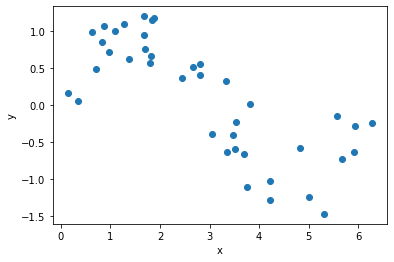

In [54]:
n = 40  # number of data points

# Simulated data:
x_data = 2*np.pi*np.random.rand(n)
noise_amp = 0.3
noise = noise_amp*np.random.randn(n)
y_data = np.sin(x_data) + noise

plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')

Next, as in our class demo, let's create polynomial feature vectors from the data and plot the prediction curve:

Text(0, 0.5, 'y')

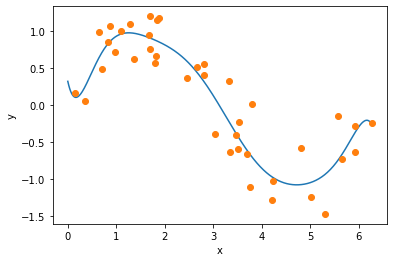

In [55]:
m = 10  # number of feature vectors (i.e. m-1 is the order of the polynomial)
alpha = 0.0  # regularization parameter

# Create the design matrix:
phi = np.zeros((n, m))
for j in range(m):
    phi[:,j] = x_data**j

# The weight vector minimizing the mean squared error:
w = np.linalg.inv(alpha*np.eye(m) + phi.T @ phi) @ phi.T @ y_data

# To plot the prediction curve, create an array of x data and corresponding y data:
x_array = np.arange(0, 2*np.pi, 0.01)
y_pred = np.zeros_like(x_array)
for i, x in enumerate(x_array):
    y_pred[i] = np.sum([w[j]*x**j for j in range(m)])
    
plt.plot(x_array, y_pred)
plt.plot(x_data, y_data, 'o')
plt.xlabel('x')
plt.ylabel('y')

**Exercise 1** (3 pts): Turn the above block of code into a function, `mse(x_data, y_data, m, alpha)`, that fits a polynomial with `m` parameters to data with regularization parameter `alpha`, as in the above block of code, and returns the MSE. Use this function to plot the MSE for different values of `alpha`, using `plt.semilogx()` to scale the x-axis logarithmically. Explain why the curve that you plot looks the way that it does.

Text(0, 0.5, 'mse(alpha)')

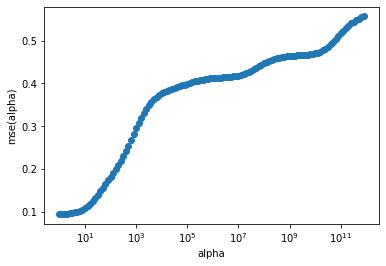

In [56]:
## Solution ##
alpha = 10**(12)

def weight_vec(x, y, m, alpha):
    # Create the design matrix:
    n = np.shape(x_data)[0]
    phi = np.zeros((n, m))
    for j in range(m):
        phi[:,j] = x_data**j

    # The weight vector minimizing the mean squared error:
    return np.linalg.inv(alpha*np.eye(m) + phi.T @ phi) @ phi.T @ y_data

def mse(x_data, y_data, m, alpha):
    w = weight_vec(x_data, y_data, m, alpha)
    
    y_diff = np.zeros_like(x_data)
    for i in range(n):
        y_diff[i] = y_data[i] - np.sum([w[j]*x_data[i]**j for j in range(m)])
    
    mse = sum(x**2 for x in y_diff)/n
    return mse

#plotting
alpha_array = np.arange(0, 12, 0.1)
mse_alpha_array = np.zeros_like(alpha_array)

for i, x in enumerate(alpha_array):
    mse_alpha_array[i] = mse(x_data, y_data, m, 10**x)
    alpha_array[i] = 10**x

plt.plot(alpha_array, mse_alpha_array, 'o')
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('mse(alpha)')


This graph matches expectation. As we increase the regularization factor $\alpha$, we are increasing the penalty for more complicated functions. Consequently, the fitted polynomial will be simpler (ie, we have preference for a lower degree polynomial). For sufficiently complicated data, it will not be possible to fit via a simple polynomial so the error is expected to increase as we use simpler models.

**Exercise 2** (3 points): Create another version of the function from above, calling the new version `mse_cv(x_data, y_data, m, alpha, cv, make_plot)`, that takes two new Boolean arguments. 
- If `cv=True`, perform cross-validation by splitting the data into training and testing sets and performing the fit with just the training data. The function should return both the MSE computed with the training data and the MSE computed with the testing data. 
- If `make_plot=True`, plot the data together with the fit. If cross-validation is used, plot the training and testing data in separate colors, with a legend to distinguish them.

(0.08507694352567662, 0.09128923970792319)


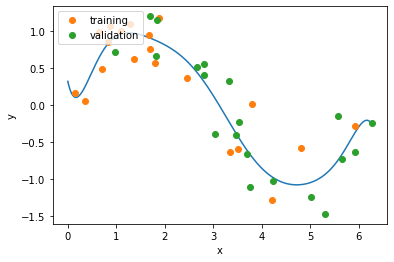

In [57]:
## Solution  ##

alpha=0

def mse_cv(x_data, y_data, m, alpha, cv=True, make_plot=False):
    if cv==False:
        mse_full = mse(x_data, y_data, m, alpha)
        
        if make_plot == True:
            x_array = np.arange(0, 2*np.pi, 0.01)
            y_pred = np.zeros_like(x_array)
            for i, x in enumerate(x_array):
                y_pred[i] = np.sum([w[j]*x**j for j in range(m)])
            
            plt.plot(x_array, y_pred)
            plt.plot(x_data, y_data, 'o')
            plt.xlabel('x')
            plt.ylabel('y')
            
    else:
        # split up data into training and validation sets
        x_train, y_train = x_data[:n//2], y_data[:n//2]
        x_val, y_val = x_data[n//2:], y_data[n//2:]
        n_train, n_val = len(x_train), len(x_val)
        
        # weight vector
        w = weight_vec(x_train, y_train, m, alpha)
    
        # computing mse on the training set and validation sets
        y_diff_train, y_diff_val = np.zeros_like(x_train), np.zeros_like(x_val)
        for i in range(n_train):
            y_diff_train[i] = y_train[i] - np.sum([w[j]*x_train[i]**j for j in range(m)])
        for i in range(n_val):
            y_diff_val[i] = y_val[i] - np.sum([w[j]*x_val[i]**j for j in range(m)])
        mse_full = (sum(x**2 for x in y_diff_train)/n_train, sum(x**2 for x in y_diff_val)/n_val)
        
        if make_plot == True:
            x_array = np.arange(0, 2*np.pi, 0.01)
            y_pred = np.zeros_like(x_array)
            for i, x in enumerate(x_array):
                y_pred[i] = np.sum([w[j]*x**j for j in range(m)])
            
            plt.plot(x_array, y_pred)
            plt.plot(x_train, y_train, 'o', label='training')
            plt.plot(x_val, y_val, 'o', label='validation')  
            plt.legend(loc='upper left')
            plt.xlabel('x')
            plt.ylabel('y')
        
    return mse_full
        
print(mse_cv(x_data, y_data, m, alpha, True, True))


**Exercise 3** (3 points): Use the above function to make a plot of both the training and testing MSE for various values of `alpha`. (This will work best if the values are evenly spaced on a log scale.) Report the value of `alpha` (an approximate value is fine) that minimizes the testing MSE. Finally, use the `make_plot` option in the function above to make two plots of the data along with the fits, where one fit doesn't use regularization, and the other fit uses the optimal value that was just found.

The alpha which minimizes mse_val is  3.9810717055347578 with a validation error of 0.08751090020137878


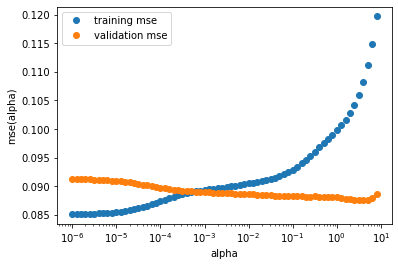

In [58]:
## Solution ##

#plotting
alpha_array = np.arange(-6, 1, 0.1)
mse_train_alpha_array, mse_val_alpha_array = np.zeros_like(alpha_array), np.zeros_like(alpha_array)

for i, x in enumerate(alpha_array):
    mse_train_alpha_array[i], mse_val_alpha_array[i] = mse_cv(x_data, y_data, m, 10**x, cv=True, make_plot=False)
    alpha_array[i] = 10**x

plt.plot(alpha_array, mse_train_alpha_array, 'o', label='training mse')
plt.plot(alpha_array, mse_val_alpha_array, 'o', label='validation mse')
plt.legend(loc='upper left')
plt.semilogx()
plt.xlabel('alpha')
plt.ylabel('mse(alpha)')

where_alpha = np.argmin(mse_val_alpha_array)
min_alpha = alpha_array[where_alpha]
print("The alpha which minimizes mse_val is ", min_alpha, "with a validation error of", mse_val_alpha_array[where_alpha])
                        

In [59]:
## Solution ##



## Linear regression with a built-in function

Now let's get the same results with less work using a built-in package. 

**Exercise 4** (3 points): Read the documentation for `linear_model.LinearRegression()` from the `sklearn` library, which contains implementations of lots of standard machine algorithms. Following the example in the documentation, and without using regularization, fit a linear model to the first half of our data, then use the `.score()` method to quantify the goodness of fit for both the training set and the testing set. (Note that the score being returned by this function is given by $r^2 = 1 - \mathrm{MSE}/\sigma^2$, where $\sigma^2$ is the variance of the data along the y dimension. This means that scores close to 1 are very good, while negative scores or scores close to zero are bad.) Plot the fit along with the data, with the training and testing data in different colors. The result should match the plot we made above.

In [60]:
from sklearn import linear_model

(0.5011045172022398, 0.5300289706977959)


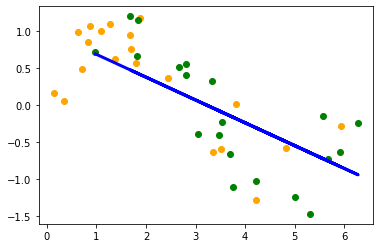

In [61]:
## Solution ##

# split up data into training and validation sets
x_train, y_train = x_data[:n//2], y_data[:n//2]
x_val, y_val = x_data[n//2:], y_data[n//2:]
n_train, n_val = len(x_train), len(x_val)

# reshaping the arrays to make it happy with sklearn packages
x_train = np.reshape(x_train,(-1,1))
y_train = y_train.reshape(-1,1)

x_val = np.reshape(x_val,(-1,1))
y_val = np.reshape(y_val,(-1,1))

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
fit = regr.fit(x_train, y_train)

# Score the linear fit, first entry is scored with training data and second set is scored with validation data
score = (fit.score(x_train,y_train), fit.score(x_val,y_val))
print(score)

# Making plots
y_pred = regr.predict(x_val)

plt.scatter(x_train, y_train, color="orange")
plt.scatter(x_val, y_val, color="green")
plt.plot(x_val, y_pred, color="blue", linewidth=3)

**Exercise 5** (3 points): Repeat the previous exercise, now using `linear_model.RidgeCV()`, which uses ridge regression (i.e. regularized just as with our `alpha` parameter above) with built-in cross validation (i.e. cross-validation is used to select the best regularization value as we did above, then the result is reported using this optimal value). You should find that the scores for the training and testing datasets are much more similar than before.

(0.487142287391899, 0.48148898517569394)


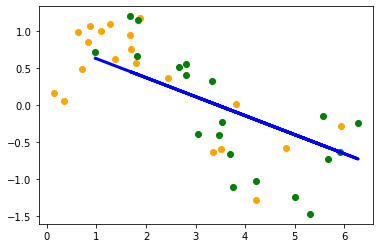

In [62]:
## Solution ### Create linear regression object
regr = linear_model.RidgeCV()

# Train the model using the training sets
fit = regr.fit(x_train, y_train)

# Score the linear fit, first entry is scored with training data and second set is scored with validation data
score = (fit.score(x_train,y_train), fit.score(x_val,y_val))
print(score)

# Making plots
y_pred = regr.predict(x_val)

plt.scatter(x_train, y_train, color="orange")
plt.scatter(x_val, y_val, color="green")
plt.plot(x_val, y_pred, color="blue", linewidth=3)

